# NovaPCA Class Tutorial

### This notebook is an introduction to the NovaPCA class. This class loads the SNID Supernovae (SNe) spectra and runs PCA analysis. The following tutorial covers all the important functionality. If you do not have pidly or the IcBL smoothing IDL code, then skip to the Save/Load section to load a pickled NovaPCA object.

## Initialization and loading SNID

In [73]:
import NovaPCA
import numpy as np
import matplotlib.pyplot as plt

In [74]:
snid_dir_path = 'allSNIDtemp/'
SNePCA = NovaPCA.NovaPCA(snid_dir_path)

In [75]:
# There are docstrings associated with each method. Access them in the following way:

#SNePCA.loadSNID?

In [76]:
# loadTypes chooses which SNe types you want to load from the SNID database.
loadTypes = [(2,1), (2,2), (2,3), (2,4), (2,5), (3,1), (3,2), (3,3), (3,4)]

# phaseType = 0 means phases are measured relative to date of max light. phaseType = 1 means relative to first obs date.
phaseType = 0

# loadPhase defines center of a phase range you want to load.
loadPhase = 15

# phRange defines width of the range. Thus you will only load spectra with a phase in the range 15 +/- 5 days.
# Note that for a given SN, you will load the spectrum with phase closest to loadPhase.
phRange = 5

# min/max wvl cuts off spectra at the min and max wavelengths.
minwvl = 4000
maxwvl = 7000
SNePCA.loadSNID(loadTypes, phaseType, loadPhase, phRange, minwvl, maxwvl)

151


In [77]:
# Each row is a spectrum measured for a different SN. Each column is the rel flux
# measured at a wavelength.
SNePCA.spectraMatrix.shape

(57, 414)

In [78]:
print SNePCA.spectraMatrix
print "There are %d spectra satisfying the constraints of loadSNID, \
each with %d wavelength bins"%(SNePCA.spectraMatrix.shape)

[[ 0.051  0.091  0.077 ..., -0.003 -0.046 -0.043]
 [ 0.417  0.515  0.607 ..., -0.129 -0.135 -0.115]
 [ 0.     0.     0.    ..., -0.2   -0.133 -0.162]
 ..., 
 [ 0.414  0.416  0.418 ...,  0.21   0.204  0.189]
 [-0.287  0.076 -0.171 ..., -0.117 -0.087 -0.124]
 [ 0.441  0.432  0.431 ...,  0.     0.     0.   ]]
There are 57 spectra satisfying the constraints of loadSNID, each with 414 wavelength bins


In [79]:
# The user specifies that each SNe should have the spectrum 
# loaded that is closest to loadPhase = 15 days. The obsSNIDPhases
# property keeps track of which phase is chosen for each SNe.
SNePCA.obsSNIDPhases

array([ 15.4 ,  15.  ,  15.96,  10.4 ,  14.2 ,  15.7 ,  13.  ,  13.  ,
        11.3 ,  15.4 ,  14.  ,  14.3 ,  13.6 ,  12.  ,  15.8 ,  12.9 ,
        14.1 ,  15.5 ,  13.4 ,  10.6 ,  13.8 ,  11.06,  15.8 ,  16.5 ,
        12.2 ,  15.7 ,  17.3 ,  12.6 ,  12.2 ,  15.  ,  16.8 ,  12.2 ,
        15.4 ,  15.2 ,  17.1 ,  15.4 ,  12.7 ,  12.8 ,  14.6 ,  18.5 ,
        16.8 ,  15.5 ,  17.  ,  11.9 ,  16.4 ,  18.3 ,  12.9 ,  16.4 ,
        15.5 ,  13.8 ,  15.  ,  15.7 ,  11.6 ,  18.  ,  14.2 ,  18.8 ,
        11.9 ])

In [80]:
# SNe names are stored in the sneNames field
SNePCA.sneNames

array(['sn2009er', 'sn2007gr', 'sn2007ru', 'sn2010ma', 'sn2004dk',
       'sn2010ay', 'sn1999dn', 'sn2011ei', 'sn1990I', 'sn2011dh',
       'sn2012ap', 'sn2006T', 'sn1998dt', 'sn1983N', 'sn2005hg',
       'sn2009iz', 'sn2003dh', 'sn2003bg', 'sn2013dx', 'sn2006aj',
       'sn2007C', 'sn1994I', 'sn2004gq', 'sn1993J', 'sn2004ge', 'sn1997ef',
       'sn2005az', 'sn2007uy', 'sn2004aw', 'sn2004gv', 'sn1998bw',
       'sn04aw_bsnip', 'sn1990B', 'sn2005la', 'PTF10qts', 'sn2010bh',
       'sn2002ap', 'sn2007Y', 'sn2009bb', 'sn2007bg', 'sn2000H',
       'sn2006jc', 'sn2011fu', 'sn1990U', 'sn2004gt', 'sn1998fa',
       'sn1984L', 'sn2011bm', 'sn2006el', 'sn2009mg', 'sn2008ax',
       'sn2008bo', 'sn2006ep', 'sn2009jf', 'sn2008D', 'sn2003jd', 'sn1983V'], 
      dtype='|S12')

In [81]:
# SNID determined SNe Types are stored in the sneTypes field.
SNePCA.sneTypes[0]

array([2, 3])

In [82]:
# The wavelength bins are stored in the wavelengths field.
SNePCA.wavelengths;

In [65]:
# remove mean from each spectrum and scale to std = 1
SNePCA.preprocess()

## IcBL Smoothing

In [12]:
IcBLMask = np.array([np.array_equal(arr, np.array([3,4])) for arr in SNePCA.sneTypes])
velcut = 3000

In [13]:
f=SNePCA.smoothSpectra(IcBLMask, velcut, figsize=(15,50))

In [14]:
f

In [16]:
notIcBLMask = np.logical_not(IcBLMask)
velcut = 1000

In [19]:
f=SNePCA.smoothSpectra(notIcBLMask, velcut, figsize=(15,100))

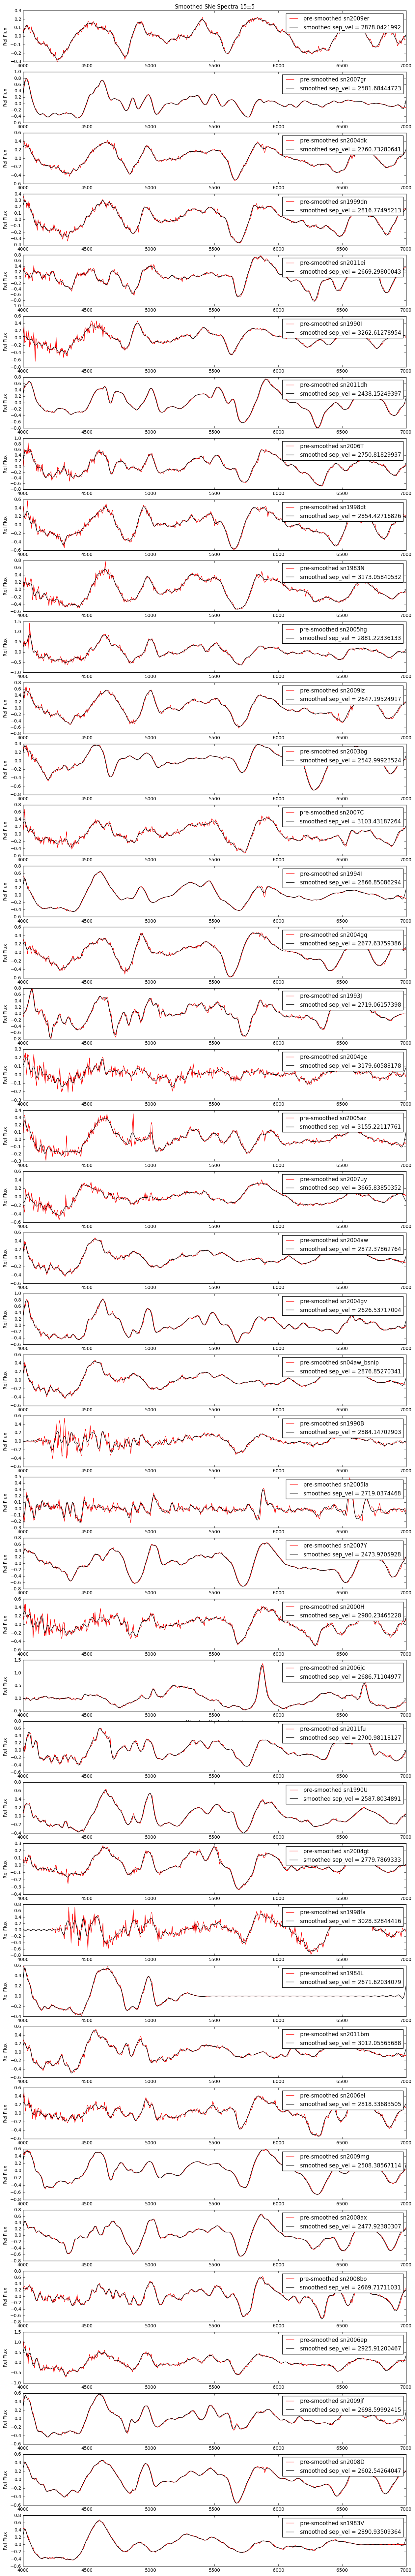

In [20]:
f

In [15]:
# Smooth the IcBL spectra and return a plot comparing smoothed spectra vs original spectra.
IcBLMask = np.array([np.array_equal(arr, np.array([3,4])) for arr in SNePCA.sneTypes])
notIcBLMask = np.invert(IcBLMask)
velcut = 3000
f = SNePCA.smoothIcBL(IcBLMask, velcut);

% Compiled module: TYPE.
% Compiled module: DEFAULT.
% Compiled module: LMFIT.
% Compiled module: LINEAR_FIT.
% Compiled module: POWERLAW.
% Compiled module: POWERLAW_FIT.
% Compiled module: INTEG.
% Compiled module: BINSPEC.
% Compiled module: SNSPECFFTSMOOTH.
sn2007ru
% Compiled module: READCOL.
% READCOL: Format keyword not supplied - All columns assumed floating point
% Compiled module: GETTOK.
% Compiled module: STRSPLIT.
% Compiled module: STRNUMBER.
% READCOL: 1024 valid lines read
% Compiled module: MOMENT.
% Compiled module: UNIQ.
% Compiled module: INTERPOL.
% Compiled module: FINDEX.
% Compiled module: MEAN.
% Compiled module: LINEAR.
% Compiled module: STDDEV.
sn2010ma
% READCOL: Format keyword not supplied - All columns assumed floating point
% READCOL: 1024 valid lines read
% Program caused arithmetic error: Floating illegal operand
% Detected at LMFIT             321 /home/data/mew488/src/idl/astro_mew488/pro1
  /lmfit.pro
% Program caused arithmetic error: Floating ille

In [13]:
f

In [39]:
f

## Preprocessing and Plotting spectra

In [31]:
SNePCA.preprocess()

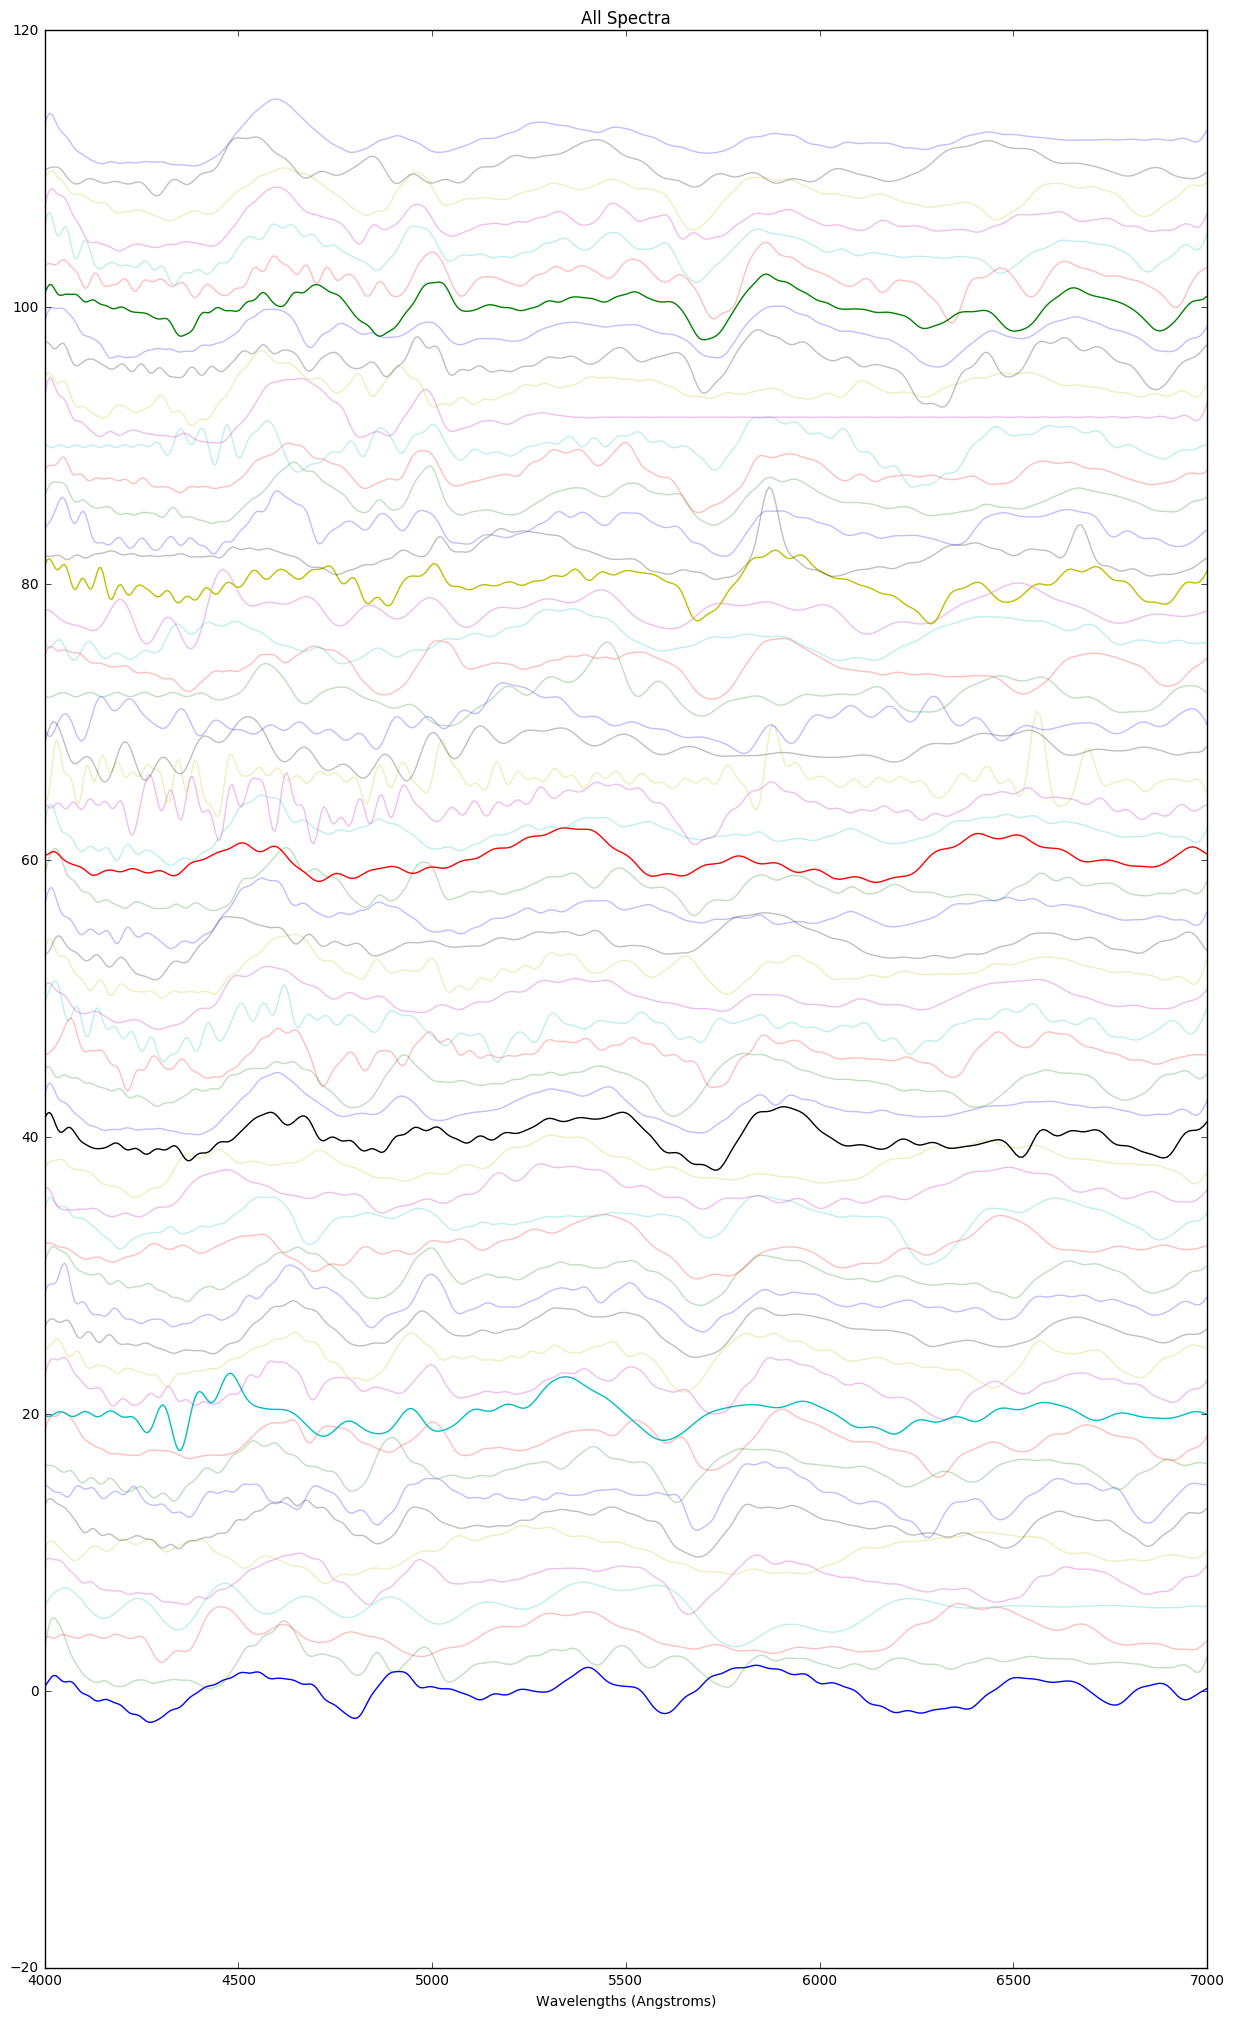

In [32]:
# plot the spectra.
SNePCA.plotSpectra(figsize=(15,25), alpha=0.25)

## Rebinning and Applying Masks

In [83]:
# Rebin the spectra to reduce resolution.
SNePCA.wavelengthRebin(smoothing=2)

In [84]:
# You may find yourself wanting to look at only subsets of the data
# contained in a NovaPCA object. For example, perhaps you want to 
# mask everything out except type Ib SNe. This method takes a user
# specified mask and applies it to all maskable attributes of the NovaPCA
# instance. The user has the option of making a deepcopy of the pre-mask
# NovaPCA object for later use.
#gapMask = np.invert(np.array([np.isnan(spec).any() for spec in SNePCA.spectraMatrix]))
gapMask = np.invert(np.array([(spec==0).any() for spec in SNePCA.spectraMatrix]))
print 'total number of bad spectra = %d'%(np.sum(np.invert(gapMask)))

total number of bad spectra = 15


In [72]:
(SNePCA.spectraMatrix[2]==0).any()

False

In [ ]:
gapMaskDoc = 'Removed spectra with large gaps in observed fluxes'
preMaskSNePCA = SNePCA.applyMask(gapMask, gapMaskDoc, savecopy=True)

In [23]:
preMaskSNePCA.spectraMatrix.shape

(57, 414)

In [24]:
SNePCA.spectraMatrix.shape

(57, 414)

In [25]:
SNePCA.maskDocs

['Removed spectra with large gaps in observed fluxes']

## Save/Load NovaPCA

In [20]:
# For quick use, there are save and load methods using pickle. This is 
# particularly useful for new users without pidly or the smoothing IDL code.
# you can run the tutorial by skipping the above steps and loading a saved pickle.
#SNePCA.save('NovaPCA_Phase15pm5.sav')
#loadedSNePCA = NovaPCA.NovaPCA('path doesnt matter because you will load a saved instance')
#loadedSNePCA = loadedSNePCA.load('NovaPCA_Phase15pm5.sav')
#SNePCA = loadedSNePCA

## PCA

In [26]:
#reload(NovaPCA)

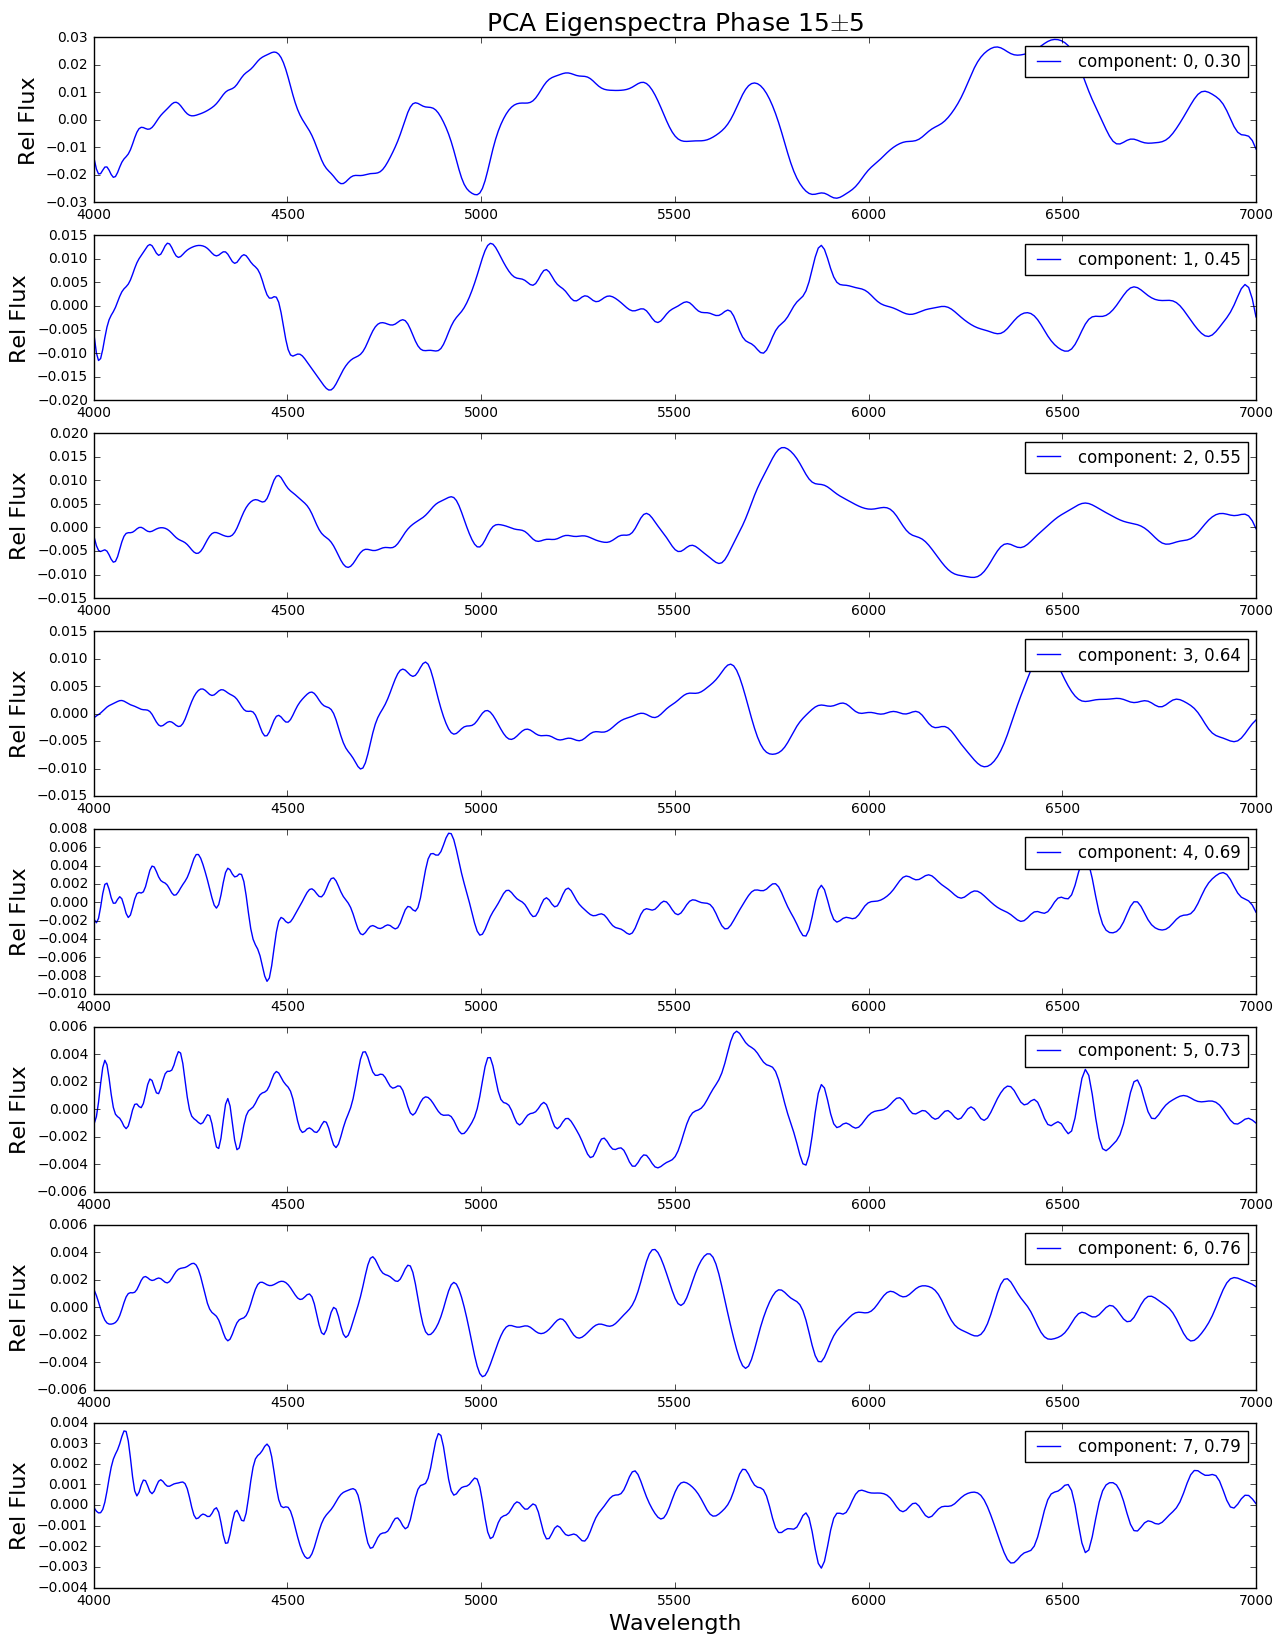

In [33]:
SNePCA.calculatePCA()
SNePCA.plotEigenspectra(figsize=(15,20), nshow=8)

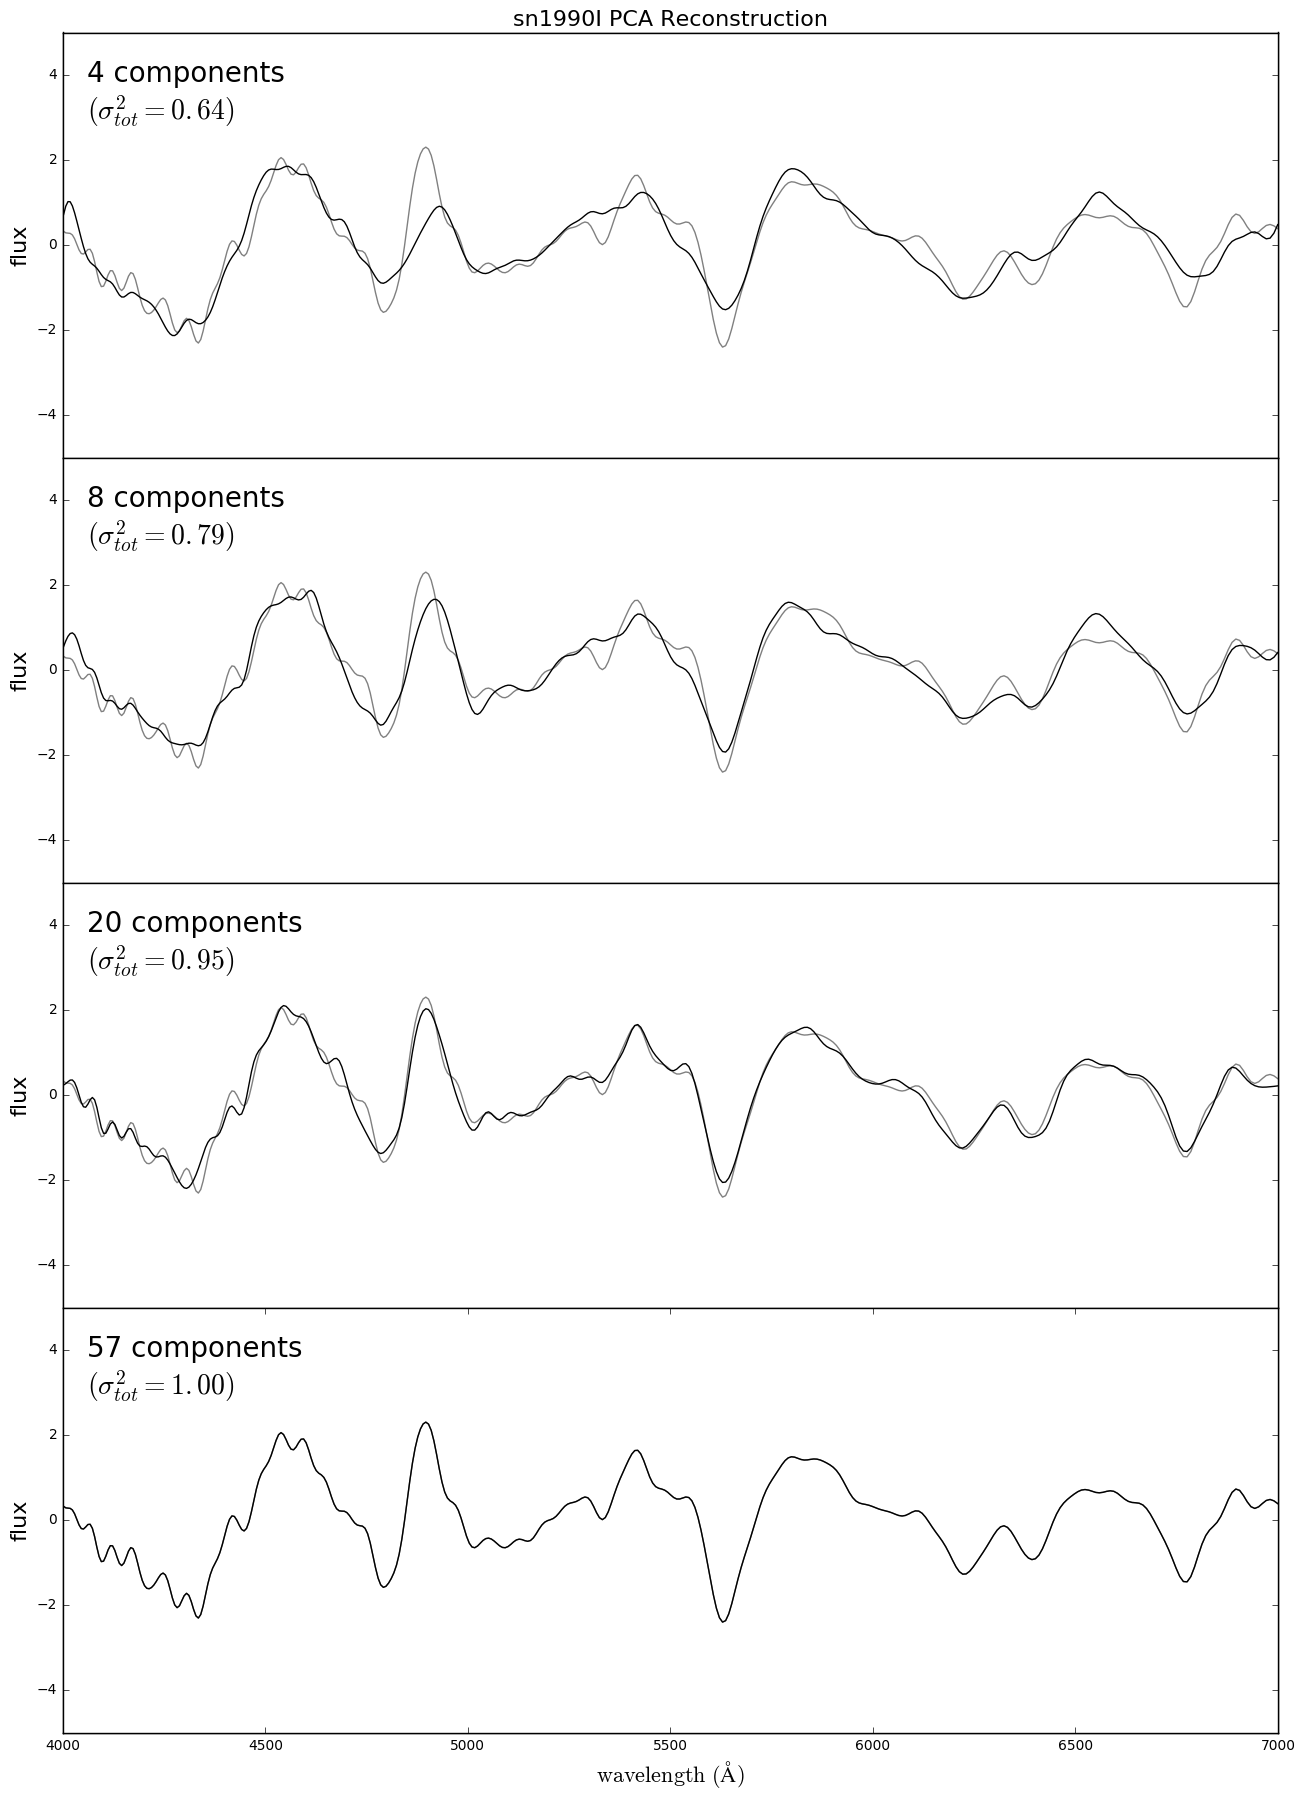

In [35]:
plt.clf()
SNePCA.reconstructSpectra(nrecon=1, nPCAComponents=[4,8,20,len(SNePCA.evecs)])

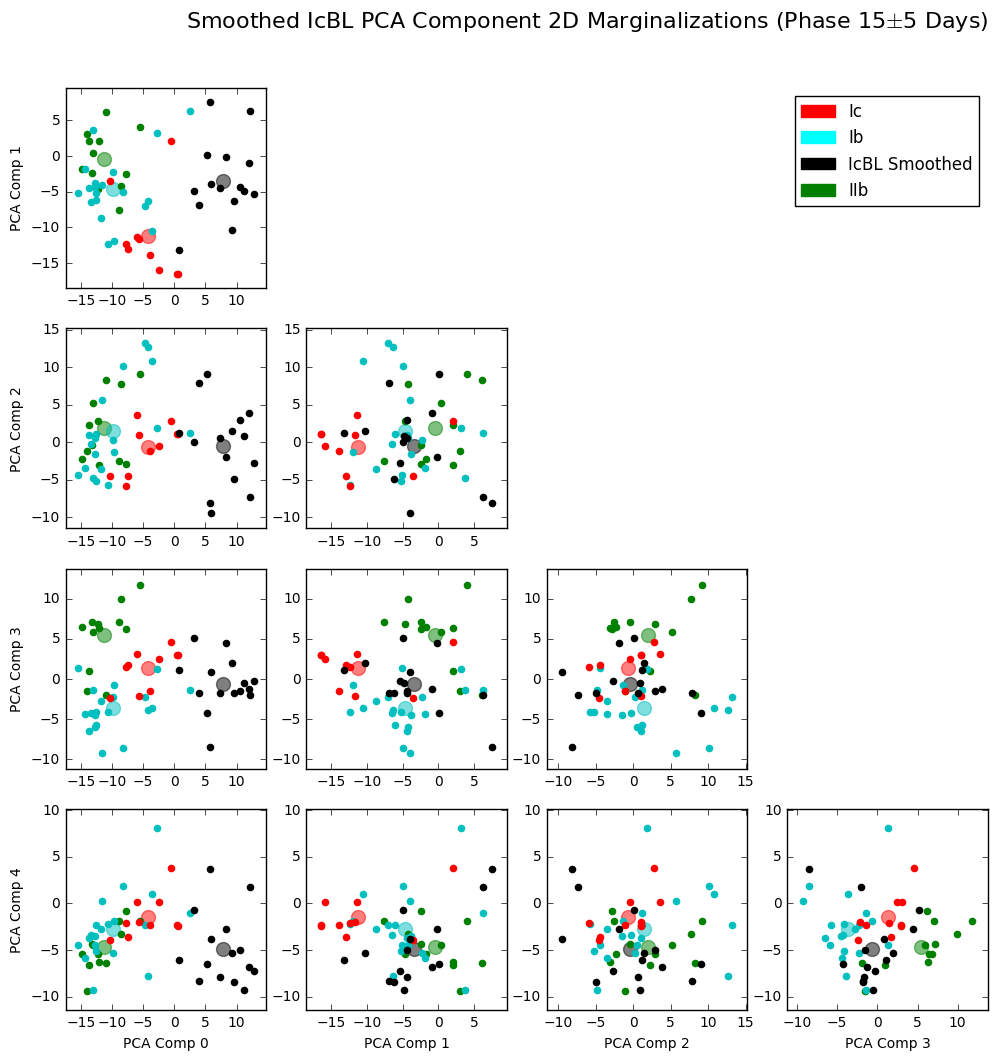

In [36]:
SNePCA.cornerplotPCA(ncomp=5, figsize=(15,15))

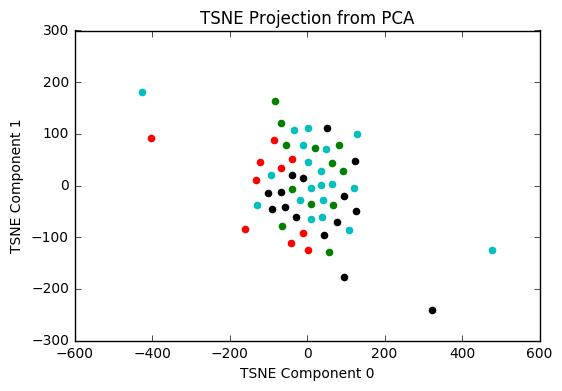

In [37]:
SNePCA.plotTSNE(nPCAComponents=5)

In [30]:
np.arange(100.0)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99.])

In [73]:
wvln = np.log(SNePCA.wavelengths)
import scipy

In [33]:
import scipy
import scipy.optimize as opt
import scipy.stats as st

def binspec(wvl, flux, wstart, wend, wbin):
    nlam = (wend - wstart) / wbin + 1
    nlam = int(np.ceil(nlam))
    outlam = np.arange(nlam) * wbin + wstart
    answer = np.zeros(nlam) 
    interplam = np.unique(np.concatenate((wvl, outlam)))  
    interpflux = np.interp(interplam, wvl, flux)
    
    for i in np.arange(0, nlam - 1):
        cond = np.logical_and(interplam >= outlam[i], interplam <= outlam[i+1])
        w = np.where(cond)
        if len(w) == 2:
            answer[i] = 0.5*(np.sum(interpflux[cond])*wbin)
        else:
            answer[i] = scipy.integrate.simps(interpflux[cond], interplam[cond])

    answer[nlam - 1] = answer[nlam - 2]
    cond = np.logical_or(outlam >= max(wvl), outlam < min(wvl))
    answer[cond] = 0
    return answer/wbin, outlam
    


def smooth(wvl, flux, cut_vel):
    c_kms = 299792.47 # speed of light in km/s
    vel_toolarge = 100000 # km/s
    
    wvl_ln = np.log(wvl)
    num = wvl_ln.shape[0]
    binsize = wvl_ln[-1] - wvl_ln[-2]
    f_bin, wln_bin = binspec(wvl_ln, flux, min(wvl_ln), max(wvl_ln), binsize)
    #print f_bin
    fbin_ft = np.fft.fft(f_bin)*len(f_bin)
    print fbin_ft
    freq = np.fft.fftfreq(num)
    num_upper = np.max(np.where(1.0/freq[1:] * c_kms * binsize > cut_vel))
    num_lower = np.max(np.where(1.0/freq[1:] * c_kms * binsize > vel_toolarge))
    mag_avg = np.mean(np.abs(fbin_ft[num_lower:num_upper+1]))
    powerlaw = lambda x, amp, exp: amp*x**exp
    
    #do linear regression on log data to obtain a guess for powerlaw parameters
    xdat = freq[num_lower:num_upper]
    ydat = np.abs(fbin_ft[num_lower:num_upper])
    nonzero_mask = xdat!=0            
    slope, intercept, _,_,_ = st.linregress(np.log(xdat[nonzero_mask]), np.log(ydat[nonzero_mask]))
    exp_guess = slope
    amp_guess = np.exp(intercept)
    print exp_guess, amp_guess
    
    #do powerlaw fit
    xdat = freq[num_lower:num_upper]
    ydat = np.abs(fbin_ft[num_lower:num_upper])
    #exclude data where x=0 because this can cause 1/0 errors if exp < 0
    finite_mask = np.logical_not(xdat==0)
    finite_mask = np.logical_and(finite_mask, np.isfinite(ydat))
    print finite_mask
    print xdat.shape
    print ydat.shape
    print xdat[finite_mask].shape
    print ydat[finite_mask].shape
    ampfit, expfit = opt.curve_fit(powerlaw, xdat[finite_mask], ydat[finite_mask], p0=[amp_guess, exp_guess])[0]

    #find intersection of average fbin_ft magnitude and powerlaw fit to calculate separation
    #velocity between signal and noise.
    intersect_x = np.power((mag_avg/ampfit), 1.0/expfit)
    sep_vel = 1.0/intersect_x * c_kms * sz
    
    #filter out frequencies with velocities higher than sep_vel
    smooth_fbin_ft = np.array([fbin_ft[ind] if np.abs(freq[ind])<np.abs(intersect_x) else 0 \
                               for ind in range(len(freq))])/len(f_bin)
    #inverse fft on smoothed fluxes
    smooth_fbin_ft_inv = np.real(np.fft.ifft(smooth_fbin_ft))
    
    #interpolate smoothed fluxes back onto original wavelengths
    w_smoothed = np.exp(wln_bin)
    f_smoothed = np.interp(w, w_smoothed, smooth_fbin_ft_inv)
    
    return w_smoothed, f_smoothed, sep_vel

In [34]:
tmp = np.loadtxt("tmp_spec.txt")
w = tmp[:,0]
wv_ln = np.log(tmp[:,0])
sz = wv_ln[-1] - wv_ln[-2]
print sz
f = tmp[:,1]

0.00135384275361


In [35]:
wsm, fsm, sep = smooth(SNePCA.wavelengths, SNePCA.spectraMatrix[2], 3000)

[ nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj  nan+nanj
  nan+

TypeError: Improper input: N=2 must not exceed M=0

In [83]:
wsmooth, fsmooth, sep_vel = smooth(w, f, 3000)
print sep_vel

8430.83937054


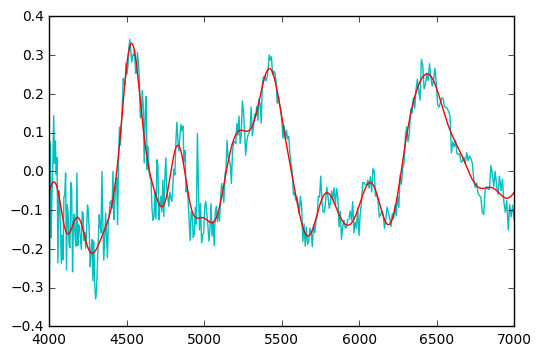

In [84]:
plt.plot(w,f,'c')
plt.plot(w,fsmooth,'r')
plt.show()

In [36]:
f_bin, wln_bin = binspec(wv_ln, f, min(wv_ln), max(wv_ln), sz)

In [37]:
fbin_ft = np.fft.fft(f_bin)*len(f_bin)

In [38]:
fbin_ft.shape

(414,)

In [39]:
fbin_ft[-1]

(-2246.956458376078-685.56111659566011j)

In [10]:
freq=np.fft.fftfreq(414)
num_upper = np.max(np.where(1.0/freq[1:]*299792.47*sz > 3000))
num_lower = np.max(np.where(1.0/freq[1:]*299792.47*sz > 100000))

In [11]:
mag_avg = np.mean(np.abs(fbin_ft[num_lower:num_upper+1]))

In [12]:
mag_avg

1223.0838668079102

In [13]:
g=lambda x,a,b: a*x**b

In [14]:
g(np.array([1,10,20]),2,3.2)

array([  2.00000000e+00,   3.16978638e+03,   2.91290272e+04])

In [15]:
def powerlaw(x, amp, exp):
    return amp*x**exp

In [16]:
powerlaw(10, 2, 3)

2000

In [17]:
import scipy.optimize as opt
import scipy.stats as st

In [18]:
xdat = np.log(freq[num_lower:num_upper])
ydat = np.log(np.abs(fbin_ft[num_lower:num_upper]))
finite_mask = np.logical_and(np.isfinite(xdat), np.isfinite(ydat))              
print finite_mask
slope, intercept, _,_,_ = st.linregress(xdat[finite_mask], ydat[finite_mask])
print slope
print intercept

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
-0.952305500812
3.62183158404


/home/data/mew488/virtualenvs/mypy2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning:

divide by zero encountered in log



In [19]:
exp_guess = slope
amp_guess = np.exp(intercept)

print exp_guess, amp_guess

-0.952305500812 37.4060173816


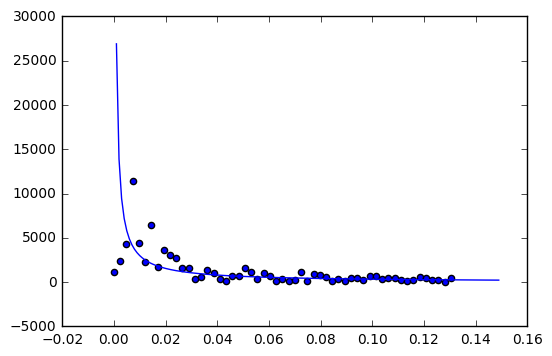

In [185]:
plt.scatter(freq[num_lower:num_upper], np.abs(fbin_ft[num_lower:num_upper]))
x=np.arange(0.001,0.15,.001)
y=amp_guess*np.power(x, exp_guess)
plt.plot(x, y)
plt.show()

In [186]:
np.power(np.array([10,20]),2)

array([100, 400])

In [187]:
1e-8+1

1.00000001

[ 0.          0.00241546  0.00483092  0.00724638  0.00966184  0.01207729
  0.01449275  0.01690821  0.01932367  0.02173913  0.02415459  0.02657005
  0.02898551  0.03140097  0.03381643  0.03623188  0.03864734  0.0410628
  0.04347826  0.04589372  0.04830918  0.05072464  0.0531401   0.05555556
  0.05797101  0.06038647  0.06280193  0.06521739  0.06763285  0.07004831
  0.07246377  0.07487923  0.07729469  0.07971014  0.0821256   0.08454106
  0.08695652  0.08937198  0.09178744  0.0942029   0.09661836  0.09903382
  0.10144928  0.10386473  0.10628019  0.10869565  0.11111111  0.11352657
  0.11594203  0.11835749  0.12077295  0.12318841  0.12560386  0.12801932
  0.13043478]
[  1117.75877037   2349.21420276   4256.07204089  11421.11239
   4389.49449755   2237.54044361   6489.82198806   1698.0254958
   3673.86508007   3110.4101591    2696.4985524    1595.79317041
   1547.36620785    399.44646366    630.87646144   1399.98027484
   1060.33149072    357.47322071    131.63049562    729.41112011
    698.5

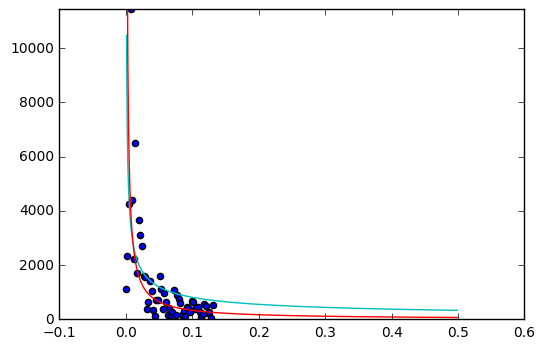

In [188]:
xdat = freq[num_lower:num_upper]
#xdat[xdat==0]=.1
print xdat
ydat = np.abs(fbin_ft[num_lower:num_upper])
print ydat

#finite_mask = np.logical_and(np.logical_not(xdat==0), np.logical_not(ydat==0))
finite_mask = np.logical_not(xdat==0)
#finite_mask[0]=True
print finite_mask

ampfit, expfit = opt.curve_fit(powerlaw, xdat[finite_mask], ydat[finite_mask], p0=[amp_guess, exp_guess])[0]
print "ampfit, expfit: ", ampfit, expfit
plt.scatter(xdat, ydat)
x=np.arange(0.001, 0.5, 0.001)
y = powerlaw(x, ampfit, expfit)
yguess = amp_guess*np.power(x, exp_guess)
plt.plot(x,y, c='c')
plt.plot(x, yguess, c='r')
plt.ylim((0,max(ydat)))
plt.show()

In [189]:
intersect_x = np.power((mag_avg/ampfit), 1.0/expfit)
sep_vel = 1.0/intersect_x * 299792.47 * sz

In [190]:
intersect_x, sep_vel

(0.048141335074601936, 8430.8393705361323)

In [191]:
freq

array([ 0.        ,  0.00241546,  0.00483092,  0.00724638,  0.00966184,
        0.01207729,  0.01449275,  0.01690821,  0.01932367,  0.02173913,
        0.02415459,  0.02657005,  0.02898551,  0.03140097,  0.03381643,
        0.03623188,  0.03864734,  0.0410628 ,  0.04347826,  0.04589372,
        0.04830918,  0.05072464,  0.0531401 ,  0.05555556,  0.05797101,
        0.06038647,  0.06280193,  0.06521739,  0.06763285,  0.07004831,
        0.07246377,  0.07487923,  0.07729469,  0.07971014,  0.0821256 ,
        0.08454106,  0.08695652,  0.08937198,  0.09178744,  0.0942029 ,
        0.09661836,  0.09903382,  0.10144928,  0.10386473,  0.10628019,
        0.10869565,  0.11111111,  0.11352657,  0.11594203,  0.11835749,
        0.12077295,  0.12318841,  0.12560386,  0.12801932,  0.13043478,
        0.13285024,  0.1352657 ,  0.13768116,  0.14009662,  0.14251208,
        0.14492754,  0.147343  ,  0.14975845,  0.15217391,  0.15458937,
        0.15700483,  0.15942029,  0.16183575,  0.16425121,  0.16

In [192]:
smooth_fbin_ft = np.array([fbin_ft[ind] if np.abs(freq[ind])<np.abs(intersect_x) else 0 for ind in range(len(freq))])/len(f_bin)
smooth_fbin_ft_inv = np.real(np.fft.ifft(smooth_fbin_ft))

In [194]:
smooth_fbin_ft_inv

array([-0.04817321, -0.04237844, -0.036924  , -0.03227062, -0.02886013,
       -0.02708492, -0.02725978, -0.02959838, -0.03419591, -0.04101936,
       -0.0499061 , -0.06057108, -0.07262211, -0.08558229, -0.09891822,
       -0.11207193, -0.12449451, -0.13567924, -0.14519187, -0.15269619,
       -0.15797329, -0.16093314, -0.16161806, -0.16019776, -0.15695673,
       -0.15227459, -0.14660119, -0.140428  , -0.13425784, -0.12857486,
       -0.12381677, -0.12035105, -0.11845632, -0.11831004, -0.11998286,
       -0.12343975, -0.12854741, -0.13508713, -0.14277194, -0.15126673,
       -0.16020974, -0.16923405, -0.17798763, -0.18615083, -0.19345038,
       -0.19966932, -0.20465264, -0.20830868, -0.21060666, -0.21157091,
       -0.21127261, -0.20981984, -0.20734675, -0.20400274, -0.19994223,
       -0.19531553, -0.19026123, -0.18490008, -0.17933053, -0.17362567,
       -0.16783131, -0.16196505, -0.15601593, -0.14994457, -0.1436837 ,
       -0.137139  , -0.13019042, -0.12269423, -0.11448605, -0.10

In [195]:
w_smoothed = np.exp(wln_bin)
f_smoothed = np.interp(w, w_smoothed, smooth_fbin_ft_inv)

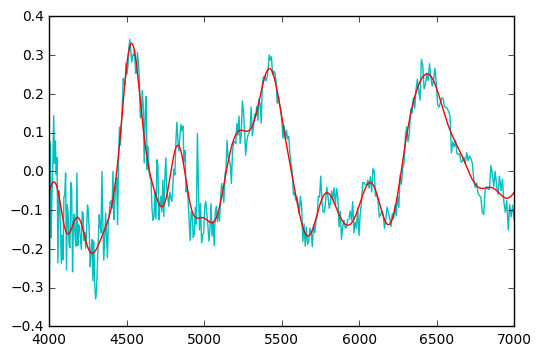

In [197]:
plt.plot(w, f, c='c')
plt.plot(w, f_smoothed, c='r')
plt.show()

In [118]:
np.abs(smooth_fbin_ft)

array([  2.69604116,   5.67073929,  10.28017472,  27.58462291,
        10.60617331,   5.40516719,  15.67722219,   4.09903864,
         8.87365266,   7.51679489,   6.51020892,   3.8556428 ,
         3.74001137,   0.96843008,   1.52160688,   3.38390648,
         2.55782368,   0.86130918,   0.31716775,   1.75983487,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

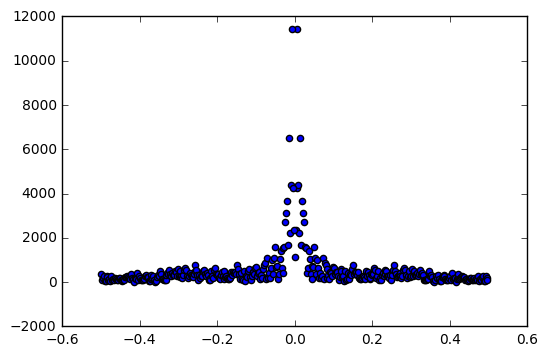

In [105]:
plt.scatter(freq,np.abs(fbin_ft))
plt.show()

In [70]:
x=freq
y=np.abs(fbin_ft)

In [82]:
y[1],x[1]

(5.6707392894985773, 0.0024154589371980675)

In [77]:
y[x==.5]

array([], dtype=float64)

In [83]:
x

array([ 0.        ,  0.00241546,  0.00483092,  0.00724638,  0.00966184,
        0.01207729,  0.01449275,  0.01690821,  0.01932367,  0.02173913,
        0.02415459,  0.02657005,  0.02898551,  0.03140097,  0.03381643,
        0.03623188,  0.03864734,  0.0410628 ,  0.04347826,  0.04589372,
        0.04830918,  0.05072464,  0.0531401 ,  0.05555556,  0.05797101,
        0.06038647,  0.06280193,  0.06521739,  0.06763285,  0.07004831,
        0.07246377,  0.07487923,  0.07729469,  0.07971014,  0.0821256 ,
        0.08454106,  0.08695652,  0.08937198,  0.09178744,  0.0942029 ,
        0.09661836,  0.09903382,  0.10144928,  0.10386473,  0.10628019,
        0.10869565,  0.11111111,  0.11352657,  0.11594203,  0.11835749,
        0.12077295,  0.12318841,  0.12560386,  0.12801932,  0.13043478,
        0.13285024,  0.1352657 ,  0.13768116,  0.14009662,  0.14251208,
        0.14492754,  0.147343  ,  0.14975845,  0.15217391,  0.15458937,
        0.15700483,  0.15942029,  0.16183575,  0.16425121,  0.16

In [ ]:
plt.scatter(xdat, ydat)

In [203]:
np.log(0)

/home/data/mew488/virtualenvs/mypy2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning:

divide by zero encountered in log



-inf

In [206]:
a = np.array([np.nan, 1,2,3])

In [211]:
np.isfinite(a)

array([False,  True,  True,  True], dtype=bool)

In [28]:
np.fft.fft(np.arange(10))

array([ 45. +0.00000000e+00j,  -5. +1.53884177e+01j,  -5. +6.88190960e+00j,
        -5. +3.63271264e+00j,  -5. +1.62459848e+00j,  -5. +4.44089210e-16j,
        -5. -1.62459848e+00j,  -5. -3.63271264e+00j,  -5. -6.88190960e+00j,
        -5. -1.53884177e+01j])

In [31]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [35]:
(max(wvln) - min(wvln))/(wvln[-1] - wvln[-2])

412.98884558327399

In [36]:
np.shape(wvln)

(414,)

In [37]:
a = np.array([1,2,3])
b = np.array([7,1,9])

In [42]:
c=np.concatenate((a,b))

In [43]:
np.sort(c)

array([1, 1, 2, 3, 7, 9])

In [44]:
np.unique(c)

array([1, 2, 3, 7, 9])

In [45]:
c

array([1, 2, 3, 7, 1, 9])

In [48]:
x = np.arange(-2,2,.1)
y = np.sin(x)

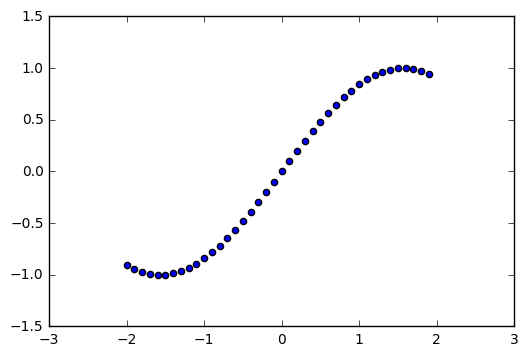

In [51]:
plt.clf()
plt.scatter(x,y)
plt.show()

In [52]:
newx = np.random.rand?

In [53]:
newx = np.random.random?

In [60]:
newx = np.random.random(len(x)/2)

In [61]:
newx

array([ 0.16971067,  0.1093868 ,  0.12010614,  0.24112682,  0.62896284,
        0.21214517,  0.38852428,  0.32381015,  0.84897546,  0.64017815,
        0.25582014,  0.47102236,  0.66694591,  0.20621233,  0.08548698,
        0.64910442,  0.21089483,  0.40071638,  0.21213705,  0.34775375])

In [63]:
newy = np.interp(newx, x, y)

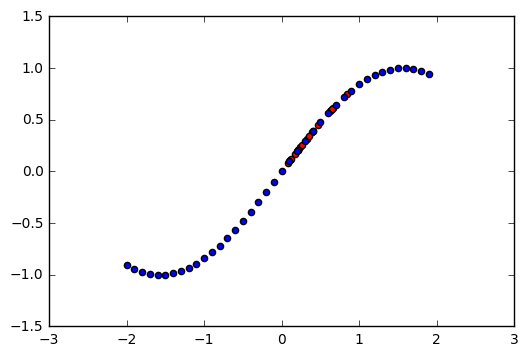

In [67]:
plt.scatter(newx, newy,c='r')
plt.scatter(x,y,c='b')
plt.show()

In [108]:
a = np.array([1,2,3,4,5,6])

In [72]:
np.where(np.logical_and(a > 1,a<3))[0]

array([1])

In [4]:
c = a%2==0

In [7]:
a[c]=0

In [8]:
a

array([1, 0, 3, 0, 5, 0])

In [109]:
[a[i] if a[i]%2==0 else -1 for i in range(len(a))]

[-1, 2, -1, 4, -1, 6]